In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import VGG16
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation(batch_size=32)

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/028.png


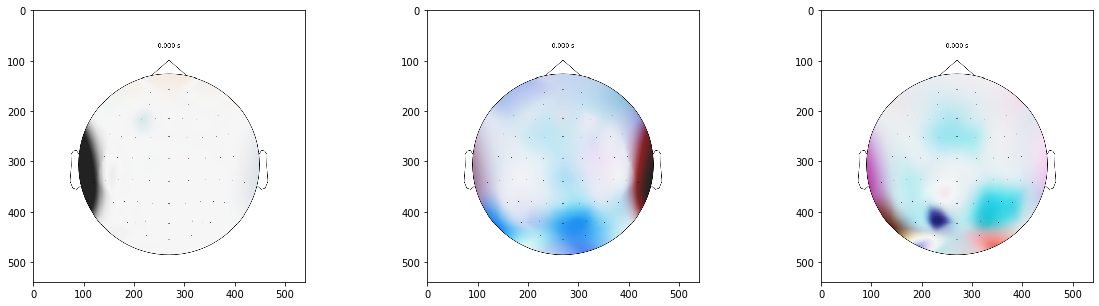

In [3]:
h.plot_examples()

In [5]:
model = VGG16(include_top=True, weights=None, input_shape=(224,224,3), classes=3)
model.summary()
# x = vgg_16.output
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
# pred = Dense(3, activation='softmax')(x)

# model = Model(inputs=vgg_16.input, outputs=pred, name='cnn_topomaps_classification_model_vgg16_ft')
# model.summary()
# def build_model(optimizer, loss, name):
#     model = Sequential(name=name)
    
#     model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#     model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
#     model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
#     model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
#     model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
#     model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
#     model.add(Flatten())
#     model.add(Dense(units=4096,activation="relu"))
#     model.add(Dense(units=4096,activation="relu"))
#     model.add(Dense(units=3, activation="softmax"))
    
#     model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
#     model.summary()
    
#     return model

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
opt = Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [8]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

ch = ModelCheckpoint('models/vgg16_ft/cnn_topomaps_classification_model_vgg16_ft.h5', monitor='val_accuracy', 
                     mode='max', save_best_only=True)

In [9]:
r = model.fit_generator(train_it, epochs=100, callbacks=[ch, tb_log], validation_data=validation_it)

Epoch 1/100
690/690 [==============================] - 220s 318ms/step - loss: 1.1054 - accuracy: 0.3347 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
690/690 [==============================] - 199s 289ms/step - loss: 1.0987 - accuracy: 0.3311 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/100
690/690 [==============================] - 199s 289ms/step - loss: 1.0987 - accuracy: 0.3324 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/100
421/690 [=================>............] - ETA: 1:12 - loss: 1.0987 - accuracy: 0.3284

KeyboardInterrupt: 

In [ ]:
evaluate = model.evaluate_generator(test_it)

In [ ]:
y_prob = model.predict_generator(test_it)

In [ ]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_vgg16')

In [ ]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_vgg16')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_vgg16.png')

In [ ]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_vgg16')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_vgg16.png')